In [1]:
#load the essential packages
import numpy as np
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import qiime2 as q2



In [2]:
data_dir = "../data/"

In [3]:
metadf = pd.read_csv('../data/metadata.tsv', sep='\t')

In [4]:
#get an overview of the data
metadf.head(5)

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0


In [5]:
#/
#I didn't get why we drop the host id here not for the whole data frame?
#which shows that there're no replicates in this dataframe
metadf_dr = metadf.drop_duplicates()

In [6]:
#and then check the results:
metadf_dr.shape[0]

1669

In [7]:
metadf.shape[0]

1669

In [8]:
#get the column names
metadf.columns.tolist()

['id',
 'Library Layout',
 'Instrument',
 'collection_date',
 'geo_location_name',
 'geo_latitude',
 'geo_longitude',
 'host_id',
 'age_days',
 'weight_kg',
 'length_cm',
 'WAZ',
 'HAZ',
 'WHZ',
 'BMI',
 'birth_weight_g',
 'birth_length_cm',
 'sex',
 'delivery_mode',
 'zygosity',
 'race',
 'ethnicity',
 'delivery_preterm',
 'diet_milk',
 'diet_weaning',
 'age_months']

In [9]:
#here do some checkings
#1. collecting time 
#get the collecting date info and weaning state
#metadf['collection_date'].sort_values().unique()
#date_mdf = metadf.sort_values(by = ['collection_date'])
#date_mdf['host_id'].value_counts()#all the samples are unique, sample only for once

In [10]:
#first to get the age, hostid and weaning state
weaningdf0 = metadf[['host_id', 'age_days', 'diet_weaning']]

In [11]:
#show the information
weaningdf0.shape

(1669, 3)

In [12]:
#drop the na values
weaningdf = weaningdf0.dropna()

In [13]:
#check again, drop 1669-743 = 928 rows
weaningdf.shape

(743, 3)

In [15]:
#this is for weaning values
weaningdf.head(5)

,host_id,age_days,diet_weaning
0,42.1,232.0,True
1,27.2,192.0,True
5,8.1,388.0,True
6,8.2,388.0,True
8,40.1,324.0,True


In [16]:
wdatedf = weaningdf.groupby(by = ['host_id', 'diet_weaning']).min('age_days').reset_index()

In [17]:
#only use thE True value for the weaning as the starting date for weaning
firstweaning = wdatedf[wdatedf['diet_weaning'] == True] 

In [18]:
#check it
firstweaning.head()

,host_id,diet_weaning,age_days
1,2.1,True,133.0
3,2.2,True,140.0
5,3.1,True,151.0
7,3.2,True,123.0
9,4.1,True,182.0


In [20]:
#rearrange the data for better visulization
firstweaning = firstweaning.sort_values(by = ['age_days'])

<AxesSubplot:title={'center':'first weaning introduction age for samples'}, xlabel='host_id'>

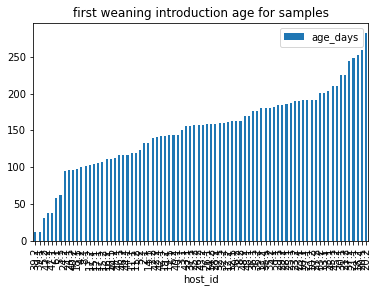

In [21]:
#plot the results
firstweaning.plot(x = 'host_id',
                 y = 'age_days',
                 kind = 'bar', 
                 title = 'first weaning introduction age for samples')

<AxesSubplot:>

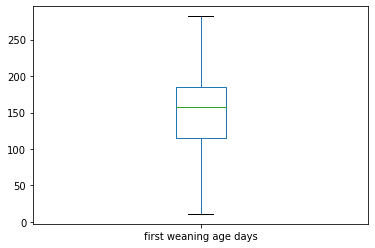

In [22]:
#Or box plot
firstweaning.age_days.to_frame(name = 'first weaning age days').boxplot(grid = False)

In [23]:
#maybe also use the summary
firstweaning['age_days'].describe()

count     80.000000
mean     150.162500
std       54.910155
min       11.000000
25%      115.250000
50%      157.000000
75%      185.250000
max      282.000000
Name: age_days, dtype: float64

In [24]:
metadf_diet_age = metadf[['age_months','delivery_preterm', '']]

In [25]:
metadf_diet_age.head(5)

,age_months,diet_milk
0,8.0,fd
1,6.0,fd
2,18.0,NaN
3,18.0,NaN
4,23.0,NaN


In [26]:
metadf_diet_age = metadf_diet_age.sort_values(by = ['age_months'])#order as the age

In [27]:
metadf_diet_age[['number']] = 1

In [28]:
countdf = metadf_diet_age.groupby(['age_months','diet_milk'])['number'].sum().reset_index()
#metadf_fiet_age.pivot_table(index=['age_months'],columns=['diet_milk'],values='销售量').reset_index()
#change it into the long table


In [29]:
countdf = countdf.pivot_table(index = ['age_months'], columns = ['diet_milk'], values = 'number').reset_index()

<AxesSubplot:title={'center':'Distribution of diet methods'}, xlabel='age_months'>

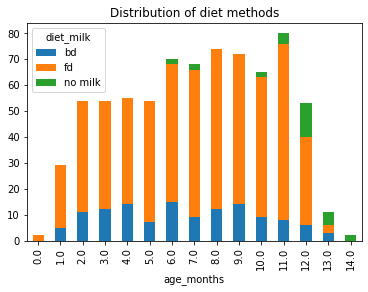

In [30]:
countdf.plot(x='age_months',
        kind='bar',
        stacked=True,
        title='Distribution of diet methods')

In [29]:
#now here is for the diet_weaning

In [30]:
!pwd

/home/jovyan/HelicopterBaby/Metadata


In [31]:
metadf.sort_values(by = ['host_id'])

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
1278,ERR1310006,PAIRED,Illumina MiSeq,2011-03-21 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,487.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,16.0
1630,ERR1311588,PAIRED,Illumina MiSeq,2010-06-25 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,218.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,fd,True,7.0
1629,ERR1311587,PAIRED,Illumina MiSeq,2010-04-02 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,133.0,6.776,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,fd,True,4.0
1628,ERR1311586,PAIRED,Illumina MiSeq,2012-11-02 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,1078.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,35.0
981,ERR1310524,PAIRED,Illumina MiSeq,2011-09-17 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,666.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,ERR1314824,PAIRED,Illumina MiSeq,2012-02-17 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,201.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,True,7.0
740,ERR1315152,PAIRED,Illumina MiSeq,2011-10-23 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,84.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,False,3.0
680,ERR1314650,PAIRED,Illumina MiSeq,2012-06-15 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,320.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,fd,True,11.0
684,ERR1315119,PAIRED,Illumina MiSeq,2011-09-22 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,52.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,False,2.0


In [31]:
display(metadf.sort_values(by = ['host_id']))

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
1278,ERR1310006,PAIRED,Illumina MiSeq,2011-03-21 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,487.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,16.0
1630,ERR1311588,PAIRED,Illumina MiSeq,2010-06-25 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,218.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,fd,True,7.0
1629,ERR1311587,PAIRED,Illumina MiSeq,2010-04-02 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,133.0,6.776,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,fd,True,4.0
1628,ERR1311586,PAIRED,Illumina MiSeq,2012-11-02 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,1078.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,35.0
981,ERR1310524,PAIRED,Illumina MiSeq,2011-09-17 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,2.1,666.0,NaN,...,53.0,male,Cesarean,Dizygotic,Caucasian,Not Hispanic,False,NaN,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,ERR1314824,PAIRED,Illumina MiSeq,2012-02-17 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,201.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,True,7.0
740,ERR1315152,PAIRED,Illumina MiSeq,2011-10-23 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,84.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,False,3.0
680,ERR1314650,PAIRED,Illumina MiSeq,2012-06-15 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,320.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,fd,True,11.0
684,ERR1315119,PAIRED,Illumina MiSeq,2011-09-22 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,48.2,52.0,NaN,...,47.0,female,Cesarean,Monozygotic,Caucasian,Hispanic,True,bd,False,2.0


In [7]:
#from 20221108
#here is the trying for the standarized weaning time
#check the metadata...
metadf.host_id == "42.1"

0       False
1       False
2       False
3       False
4       False
        ...  
1664    False
1665    False
1666    False
1667    False
1668    False
Name: host_id, Length: 1669, dtype: bool